<h1 align="center">Airlines</h1>

<h5 align="right">@aiskido</h5>

<p><b>Importing packages</b></p>

In [1]:
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns
import statsmodels.api as sm
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime as dt

C:\Users\aaysa\AppData\Local\Temp\ipykernel_12396\3314572095.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import thinkstats2
import thinkplot

<h3>Reading the Data</h3>

In [3]:
data = pd.read_csv("airlines.csv")

In [4]:
data

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,"San Diego, CA: San Diego International",2016/01,1,January,2016,280,397,171,2,...,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,"Seattle, WA: Seattle/Tacoma International",2016/01,1,January,2016,357,513,351,2,...,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,"San Francisco, CA: San Francisco International",2016/01,1,January,2016,560,947,2194,2,...,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,"Salt Lake City, UT: Salt Lake City International",2016/01,1,January,2016,338,540,253,3,...,1175,14,7426,8699,32066,33682,8057,57,76978,3116


In [5]:
data.columns

Index(['Airport.Code', 'Airport.Name', 'Time.Label', 'Time.Month',
       'Time.Month Name', 'Time.Year', 'Statistics.# of Delays.Carrier',
       'Statistics.# of Delays.Late Aircraft',
       'Statistics.# of Delays.National Aviation System',
       'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather',
       'Statistics.Carriers.Names', 'Statistics.Carriers.Total',
       'Statistics.Flights.Cancelled', 'Statistics.Flights.Delayed',
       'Statistics.Flights.Diverted', 'Statistics.Flights.On Time',
       'Statistics.Flights.Total', 'Statistics.Minutes Delayed.Carrier',
       'Statistics.Minutes Delayed.Late Aircraft',
       'Statistics.Minutes Delayed.National Aviation System',
       'Statistics.Minutes Delayed.Security',
       'Statistics.Minutes Delayed.Total',
       'Statistics.Minutes Delayed.Weather'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Airport.Code                                         4408 non-null   object
 1   Airport.Name                                         4408 non-null   object
 2   Time.Label                                           4408 non-null   object
 3   Time.Month                                           4408 non-null   int64 
 4   Time.Month Name                                      4408 non-null   object
 5   Time.Year                                            4408 non-null   int64 
 6   Statistics.# of Delays.Carrier                       4408 non-null   int64 
 7   Statistics.# of Delays.Late Aircraft                 4408 non-null   int64 
 8   Statistics.# of Delays.National Aviation System      4408 non-null   int64 
 9

In [7]:
data.describe()

,Time.Month,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.578947,2009.243421,574.632486,789.078947,954.580309,5.575544,78.216878,12.253403,213.558076,2402.000454,27.880898,9254.420826,11897.860254,35021.369782,49410.274955,45077.107985,211.769737,135997.535163,6276.982759
std,3.457890,3.667475,329.616475,561.798420,921.907801,6.007046,75.181726,2.289861,288.873477,1710.947613,36.356399,5337.214211,6861.691876,24327.721037,38750.017050,57636.745683,257.174789,113972.276370,6477.417169
min,1.000000,2003.000000,112.000000,86.000000,61.000000,-1.000000,1.000000,3.000000,3.000000,283.000000,0.000000,2003.000000,2533.000000,6016.000000,5121.000000,2183.000000,0.000000,14752.000000,46.000000
25%,4.000000,2006.000000,358.000000,425.000000,399.000000,2.000000,33.000000,11.000000,58.000000,1298.750000,8.000000,5708.750000,7400.000000,19530.750000,25084.250000,14389.000000,65.000000,65444.750000,2310.750000
50%,7.000000,2009.000000,476.000000,618.500000,667.500000,4.000000,58.000000,12.000000,123.000000,1899.000000,15.000000,7477.000000,9739.500000,27782.000000,37483.000000,25762.000000,141.000000,100711.000000,4298.500000
75%,10.000000,2012.000000,692.000000,959.000000,1166.000000,7.000000,98.000000,14.000000,250.000000,2950.000000,32.000000,10991.500000,13842.500000,41606.000000,59951.250000,50362.000000,274.000000,164294.750000,7846.000000
max,12.000000,2016.000000,3087.000000,4483.000000,9066.000000,94.000000,812.000000,18.000000,3680.000000,13699.000000,442.000000,31468.000000,38241.000000,220796.000000,345456.000000,602479.000000,4949.000000,989367.000000,76770.000000


In [8]:
column_list = data.columns.values.tolist()
for column_name in column_list:
    print(column_name,':')
    print(data[column_name].unique())

Airport.Code :
['ATL' 'BOS' 'BWI' 'CLT' 'DCA' 'DEN' 'DFW' 'DTW' 'EWR' 'FLL' 'IAD' 'IAH'
 'JFK' 'LAS' 'LAX' 'LGA' 'MCO' 'MDW' 'MIA' 'MSP' 'ORD' 'PDX' 'PHL' 'PHX'
 'SAN' 'SEA' 'SFO' 'SLC' 'TPA']
Airport.Name :
['Atlanta, GA: Hartsfield-Jackson Atlanta International'
 'Boston, MA: Logan International'
 'Baltimore, MD: Baltimore/Washington International Thurgood Marshall'
 'Charlotte, NC: Charlotte Douglas International'
 'Washington, DC: Ronald Reagan Washington National'
 'Denver, CO: Denver International'
 'Dallas/Fort Worth, TX: Dallas/Fort Worth International'
 'Detroit, MI: Detroit Metro Wayne County'
 'Newark, NJ: Newark Liberty International'
 'Fort Lauderdale, FL: Fort Lauderdale-Hollywood International'
 'Washington, DC: Washington Dulles International'
 'Houston, TX: George Bush Intercontinental/Houston'
 'New York, NY: John F. Kennedy International'
 'Las Vegas, NV: McCarran International'
 'Los Angeles, CA: Los Angeles International' 'New York, NY: LaGuardia'
 'Orlando, FL: Or

<h3>Data Preparation </h3>

In [9]:
data.isnull().sum()

Airport.Code                                           0
Airport.Name                                           0
Time.Label                                             0
Time.Month                                             0
Time.Month Name                                        0
Time.Year                                              0
Statistics.# of Delays.Carrier                         0
Statistics.# of Delays.Late Aircraft                   0
Statistics.# of Delays.National Aviation System        0
Statistics.# of Delays.Security                        0
Statistics.# of Delays.Weather                         0
Statistics.Carriers.Names                              0
Statistics.Carriers.Total                              0
Statistics.Flights.Cancelled                           0
Statistics.Flights.Delayed                             0
Statistics.Flights.Diverted                            0
Statistics.Flights.On Time                             0
Statistics.Flights.Total       

<p>At our dataset we don't have any nan values</p>

<p><b>Outliers </b></p>

count    4408.000000
mean        6.578947
std         3.457890
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: Time.Month, dtype: float64

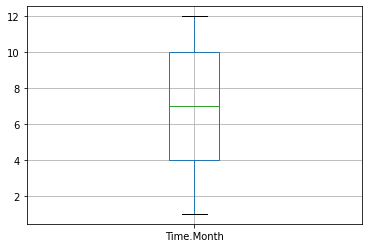

In [10]:
data.boxplot('Time.Month')
data['Time.Month'].describe()

count    4408.000000
mean     2009.243421
std         3.667475
min      2003.000000
25%      2006.000000
50%      2009.000000
75%      2012.000000
max      2016.000000
Name: Time.Year, dtype: float64

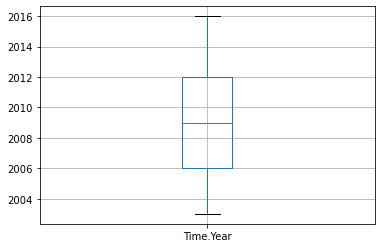

In [11]:
data.boxplot('Time.Year')
data['Time.Year'].describe()

count     4408.000000
mean     11897.860254
std       6861.691876
min       2533.000000
25%       7400.000000
50%       9739.500000
75%      13842.500000
max      38241.000000
Name: Statistics.Flights.Total, dtype: float64

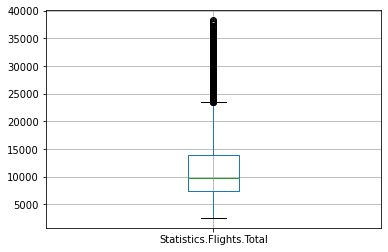

In [12]:
data.boxplot('Statistics.Flights.Total')
data['Statistics.Flights.Total'].describe()

count      4408.000000
mean     135997.535163
std      113972.276370
min       14752.000000
25%       65444.750000
50%      100711.000000
75%      164294.750000
max      989367.000000
Name: Statistics.Minutes Delayed.Total, dtype: float64

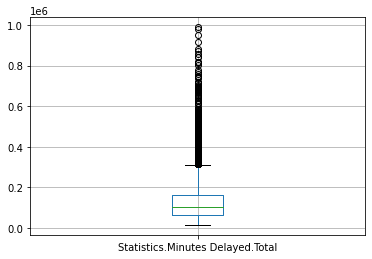

In [13]:
data.boxplot('Statistics.Minutes Delayed.Total')
data['Statistics.Minutes Delayed.Total'].describe()

<p>At our dataset we don't have any outliers</p>

<h3>Visualizing Data</h3>

<AxesSubplot:ylabel='Frequency'>

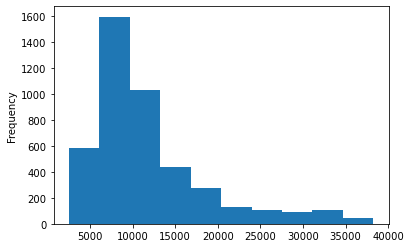

In [14]:
data['Statistics.Flights.Total'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

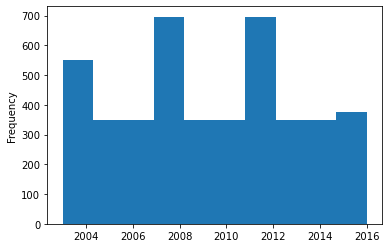

In [15]:
data['Time.Year'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

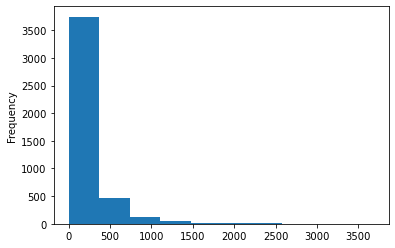

In [16]:
data['Statistics.Flights.Cancelled'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

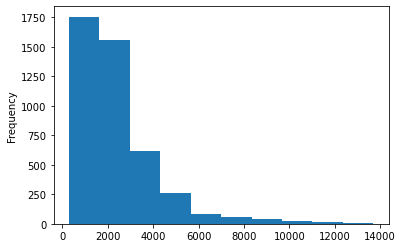

In [17]:
data['Statistics.Flights.Delayed'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

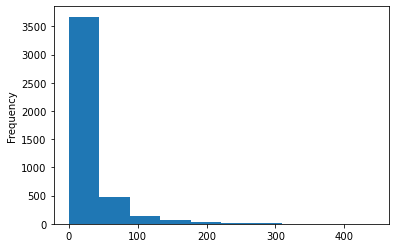

In [18]:
data['Statistics.Flights.Diverted'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

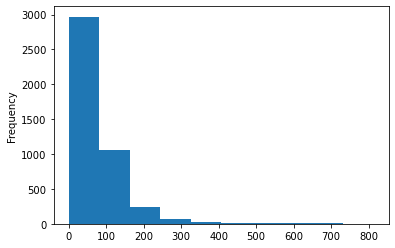

In [19]:
data['Statistics.# of Delays.Weather'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

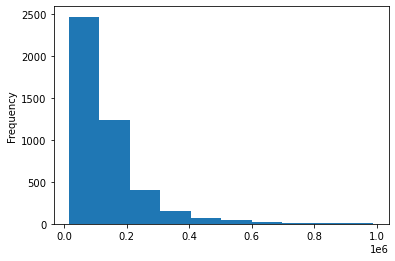

In [20]:
data['Statistics.Minutes Delayed.Total'].plot(kind = 'hist')

<h3>PMF, CDF</h3>

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Airport.Code                                         4408 non-null   object
 1   Airport.Name                                         4408 non-null   object
 2   Time.Label                                           4408 non-null   object
 3   Time.Month                                           4408 non-null   int64 
 4   Time.Month Name                                      4408 non-null   object
 5   Time.Year                                            4408 non-null   int64 
 6   Statistics.# of Delays.Carrier                       4408 non-null   int64 
 7   Statistics.# of Delays.Late Aircraft                 4408 non-null   int64 
 8   Statistics.# of Delays.National Aviation System      4408 non-null   int64 
 9

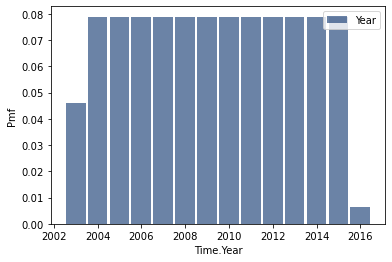

In [22]:
pmf = thinkstats2.Pmf(data['Time.Year'], label='Year')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Time.Year', ylabel='Pmf')

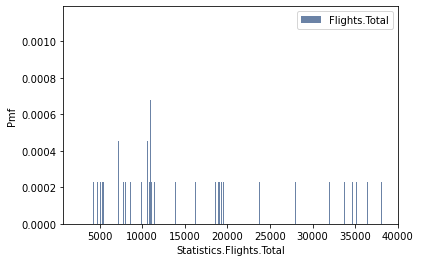

In [23]:
pmf = thinkstats2.Pmf(data['Statistics.Flights.Total'], label='Flights.Total')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Statistics.Flights.Total', ylabel='Pmf')

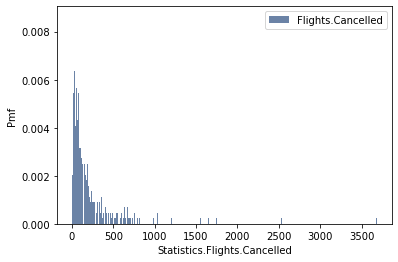

In [24]:
pmf = thinkstats2.Pmf(data['Statistics.Flights.Cancelled'], label='Flights.Cancelled')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Statistics.Flights.Cancelled', ylabel='Pmf')

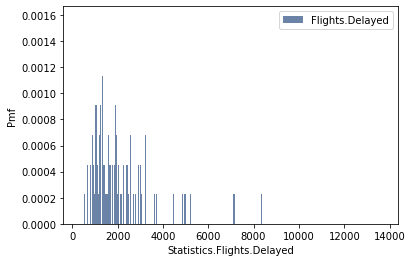

In [25]:
pmf = thinkstats2.Pmf(data['Statistics.Flights.Delayed'], label='Flights.Delayed')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Statistics.Flights.Delayed', ylabel='Pmf')

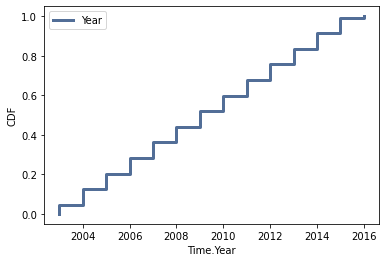

In [26]:
cdf = thinkstats2.Cdf(data['Time.Year'], label='Year')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Time.Year', ylabel='CDF', loc='upper left')

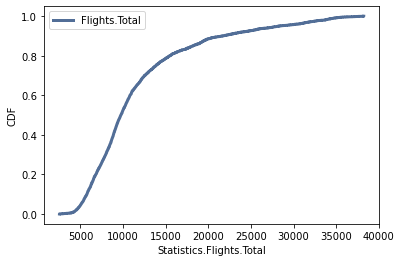

In [27]:
cdf = thinkstats2.Cdf(data['Statistics.Flights.Total'], label='Flights.Total')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Statistics.Flights.Total', ylabel='CDF', loc='upper left')

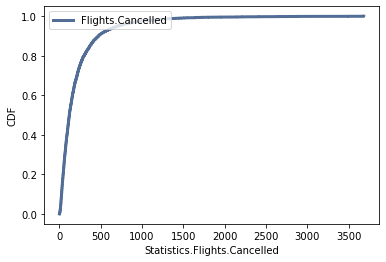

In [28]:
cdf = thinkstats2.Cdf(data['Statistics.Flights.Cancelled'], label='Flights.Cancelled')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Statistics.Flights.Cancelled', ylabel='CDF', loc='upper left')

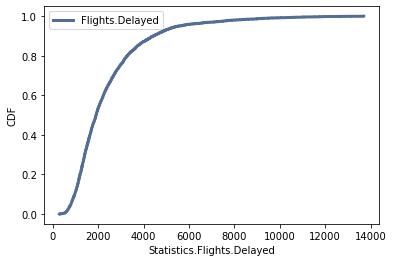

In [29]:
cdf = thinkstats2.Cdf(data['Statistics.Flights.Delayed'], label='Flights.Delayed')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Statistics.Flights.Delayed', ylabel='CDF', loc='upper left')

In [30]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

In [31]:
EvalCdf(data['Time.Year'], 2010)

0.5986842105263158

<h3>Modelling Distributions:</h3>

<p>1. Exponential distribution model:</p>

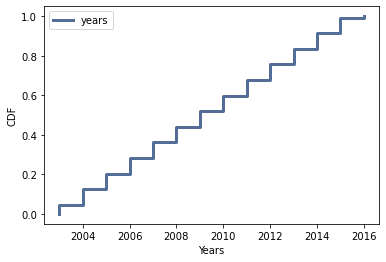

In [32]:
cdf = thinkstats2.Cdf(data['Time.Year'], label='years')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Years', ylabel='CDF')

<p>2. Normal probability plot:</p>

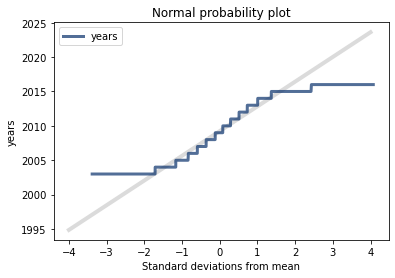

In [33]:
mean, var = thinkstats2.TrimmedMeanVar(data['Time.Year'], p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(data['Time.Year'])
thinkplot.Plot(xs, ys, label='years')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='years')

<p>3. Lognormal distribution model:</p>

In [34]:
def MakeNormalPlot(years):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(years, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(years)
    thinkplot.Plot(xs, ys, label='years')

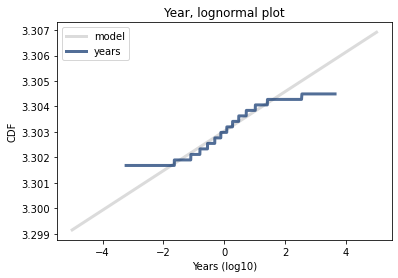

In [35]:
log_years = np.log10(data['Time.Year'])
MakeNormalPlot(log_years)
thinkplot.Config(title='Year, lognormal plot', xlabel='Years (log10)',
                 ylabel='CDF', loc='upper left')

<p>4. Pareto distribution model:</p>

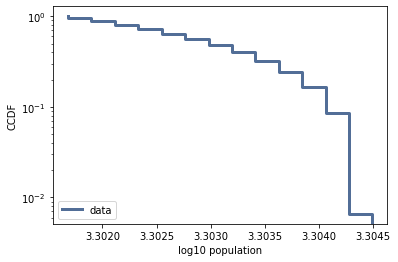

In [36]:
log_pops = np.log10(data['Time.Year'])
cdf = thinkstats2.Cdf(data['Time.Year'], label='data')
cdf_log = thinkstats2.Cdf(log_pops, label='data')


thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

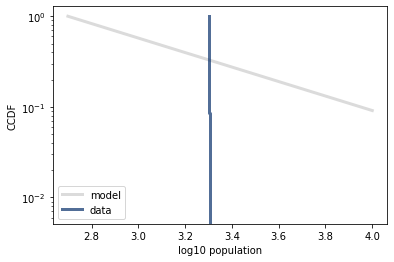

In [37]:
log_pops = np.log10(data['Time.Year'])
cdf = thinkstats2.Cdf(data['Time.Year'], label='data')
cdf_log = thinkstats2.Cdf(log_pops, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=500, alpha=0.8, low=0, high=1e4)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

<h3>Relationships between variables:</h3>

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Airport.Code                                         4408 non-null   object
 1   Airport.Name                                         4408 non-null   object
 2   Time.Label                                           4408 non-null   object
 3   Time.Month                                           4408 non-null   int64 
 4   Time.Month Name                                      4408 non-null   object
 5   Time.Year                                            4408 non-null   int64 
 6   Statistics.# of Delays.Carrier                       4408 non-null   int64 
 7   Statistics.# of Delays.Late Aircraft                 4408 non-null   int64 
 8   Statistics.# of Delays.National Aviation System      4408 non-null   int64 
 9

<p>1. Build Scatter plots for variables of your dataset. Apply Jittering and HexBin. Describe and characterize the relationship between variables:</p>

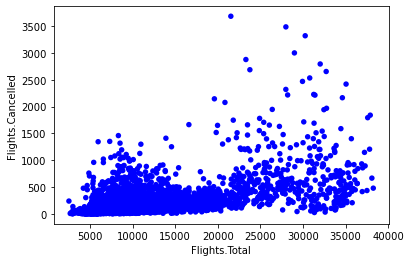

In [39]:
thinkplot.Scatter(data['Statistics.Flights.Total'], data['Statistics.Flights.Cancelled'], alpha=1)
thinkplot.Config(xlabel='Flights.Total',
                 ylabel='Flights.Cancelled',
                 legend=False)

In [40]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [41]:
Flights_total = Jitter(data['Statistics.Flights.Total'], 1.4)
Flights_cancelled = Jitter(data['Statistics.Flights.Cancelled'], 0.5)

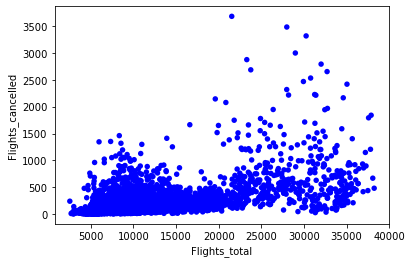

In [42]:
thinkplot.Scatter(Flights_total, Flights_cancelled, alpha=1)
thinkplot.Config(xlabel='Flights_total',
                 ylabel='Flights_cancelled',
                 legend=False)

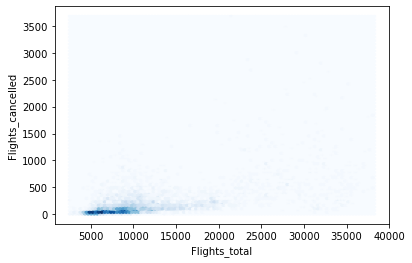

In [43]:
thinkplot.HexBin(Flights_total, Flights_cancelled)
thinkplot.Config(xlabel='Flights_total',
                 ylabel='Flights_cancelled',
                 legend=False)

<p>2. Assess the relationship between variables ( Compute Correlation, Covariance, Pearson's correlation, Spearman's rank correlation)</p>

In [44]:
data.corr()

,Time.Month,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
Time.Month,1.000000,-0.075977,-0.008749,-0.021178,-0.010177,0.044398,-0.063141,0.009466,-0.132985,-0.016750,-0.009689,0.024357,0.009119,-0.019420,-0.027362,-0.008659,0.043901,-0.021451,-0.065504
Time.Year,-0.075977,1.000000,-0.067204,0.000373,-0.195279,-0.315334,-0.191346,-0.483083,-0.046951,-0.127542,-0.005181,-0.052625,-0.074740,0.028561,0.026476,-0.150661,-0.249772,-0.069273,-0.134033
Statistics.# of Delays.Carrier,-0.008749,-0.067204,1.000000,0.872725,0.648211,0.407397,0.729619,0.333489,0.518305,0.861985,0.440189,0.758744,0.829259,0.952155,0.836543,0.532933,0.380787,0.798300,0.708586
Statistics.# of Delays.Late Aircraft,-0.021178,0.000373,0.872725,1.000000,0.703330,0.312898,0.684675,0.268856,0.608284,0.906646,0.541561,0.741917,0.831632,0.894121,0.979729,0.626905,0.297629,0.881326,0.697966
Statistics.# of Delays.National Aviation System,-0.010177,-0.195279,0.648211,0.703330,1.000000,0.216732,0.731453,0.263649,0.655539,0.927546,0.485182,0.590919,0.721083,0.691461,0.730317,0.956954,0.243707,0.920091,0.698585
Statistics.# of Delays.Security,0.044398,-0.315334,0.407397,0.312898,0.216732,1.000000,0.278034,0.235272,0.117530,0.313698,0.132249,0.258856,0.285214,0.297827,0.263751,0.148077,0.868281,0.244291,0.249887
Statistics.# of Delays.Weather,-0.063141,-0.191346,0.729619,0.684675,0.731453,0.278034,1.000000,0.234537,0.586373,0.804410,0.563340,0.556228,0.660898,0.755613,0.697096,0.659647,0.280510,0.787211,0.962323
Statistics.Carriers.Total,0.009466,-0.483083,0.333489,0.268856,0.263649,0.235272,0.234537,1.000000,0.160970,0.305701,0.074464,0.280551,0.301617,0.250009,0.223946,0.198423,0.203467,0.241707,0.200550
Statistics.Flights.Cancelled,-0.132985,-0.046951,0.518305,0.608284,0.655539,0.117530,0.586373,0.160970,1.000000,0.678981,0.428933,0.413247,0.535110,0.591412,0.656723,0.675313,0.138741,0.726973,0.626871
Statistics.Flights.Delayed,-0.016750,-0.127542,0.861985,0.906646,0.927546,0.313698,0.804410,0.305701,0.678981,1.000000,0.549239,0.733519,0.851394,0.883851,0.907936,0.853660,0.317777,0.974404,0.785264


In [45]:
data.corr(method="spearman")

,Time.Month,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
Time.Month,1.000000,-0.072770,-0.037181,-0.053895,-0.026052,-0.001039,-0.113826,0.008672,-0.157024,-0.040566,-0.038609,0.027811,0.008599,-0.046696,-0.064539,-0.030548,-0.001024,-0.049562,-0.117084
Time.Year,-0.072770,1.000000,-0.052104,-0.029786,-0.200962,-0.333979,-0.192962,-0.506229,-0.102746,-0.139043,0.007044,-0.072858,-0.100503,0.039834,0.014830,-0.151463,-0.294573,-0.061224,-0.140185
Statistics.# of Delays.Carrier,-0.037181,-0.052104,1.000000,0.880781,0.683775,0.505423,0.684289,0.373353,0.584775,0.867874,0.419035,0.706763,0.791568,0.954060,0.857975,0.627649,0.500334,0.825991,0.659712
Statistics.# of Delays.Late Aircraft,-0.053895,-0.029786,0.880781,1.000000,0.698264,0.474499,0.700991,0.324573,0.603902,0.899984,0.505722,0.683779,0.783106,0.858472,0.975714,0.665008,0.464431,0.876355,0.691882
Statistics.# of Delays.National Aviation System,-0.026052,-0.200962,0.683775,0.698264,1.000000,0.345904,0.775227,0.378967,0.712208,0.925383,0.577750,0.591427,0.731567,0.737409,0.731337,0.973349,0.368501,0.911036,0.750054
Statistics.# of Delays.Security,-0.001039,-0.333979,0.505423,0.474499,0.345904,1.000000,0.368619,0.294187,0.230853,0.459390,0.175901,0.385948,0.428422,0.424783,0.418826,0.284084,0.914211,0.388040,0.344558
Statistics.# of Delays.Weather,-0.113826,-0.192962,0.684289,0.700991,0.775227,0.368619,1.000000,0.313539,0.717494,0.822930,0.613863,0.476909,0.611059,0.722655,0.744429,0.800460,0.380413,0.849053,0.971992
Statistics.Carriers.Total,0.008672,-0.506229,0.373353,0.324573,0.378967,0.294187,0.313539,1.000000,0.321521,0.400578,0.107620,0.349414,0.395290,0.306770,0.279194,0.315962,0.273812,0.331122,0.271228
Statistics.Flights.Cancelled,-0.157024,-0.102746,0.584775,0.603902,0.712208,0.230853,0.717494,0.321521,1.000000,0.721996,0.525759,0.449515,0.581386,0.645831,0.641044,0.722794,0.252853,0.746780,0.717849
Statistics.Flights.Delayed,-0.040566,-0.139043,0.867874,0.899984,0.925383,0.459390,0.822930,0.400578,0.721996,1.000000,0.578599,0.691364,0.826970,0.882619,0.907621,0.891069,0.465602,0.977640,0.798195


In [46]:
data.corr(method="pearson")

,Time.Month,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
Time.Month,1.000000,-0.075977,-0.008749,-0.021178,-0.010177,0.044398,-0.063141,0.009466,-0.132985,-0.016750,-0.009689,0.024357,0.009119,-0.019420,-0.027362,-0.008659,0.043901,-0.021451,-0.065504
Time.Year,-0.075977,1.000000,-0.067204,0.000373,-0.195279,-0.315334,-0.191346,-0.483083,-0.046951,-0.127542,-0.005181,-0.052625,-0.074740,0.028561,0.026476,-0.150661,-0.249772,-0.069273,-0.134033
Statistics.# of Delays.Carrier,-0.008749,-0.067204,1.000000,0.872725,0.648211,0.407397,0.729619,0.333489,0.518305,0.861985,0.440189,0.758744,0.829259,0.952155,0.836543,0.532933,0.380787,0.798300,0.708586
Statistics.# of Delays.Late Aircraft,-0.021178,0.000373,0.872725,1.000000,0.703330,0.312898,0.684675,0.268856,0.608284,0.906646,0.541561,0.741917,0.831632,0.894121,0.979729,0.626905,0.297629,0.881326,0.697966
Statistics.# of Delays.National Aviation System,-0.010177,-0.195279,0.648211,0.703330,1.000000,0.216732,0.731453,0.263649,0.655539,0.927546,0.485182,0.590919,0.721083,0.691461,0.730317,0.956954,0.243707,0.920091,0.698585
Statistics.# of Delays.Security,0.044398,-0.315334,0.407397,0.312898,0.216732,1.000000,0.278034,0.235272,0.117530,0.313698,0.132249,0.258856,0.285214,0.297827,0.263751,0.148077,0.868281,0.244291,0.249887
Statistics.# of Delays.Weather,-0.063141,-0.191346,0.729619,0.684675,0.731453,0.278034,1.000000,0.234537,0.586373,0.804410,0.563340,0.556228,0.660898,0.755613,0.697096,0.659647,0.280510,0.787211,0.962323
Statistics.Carriers.Total,0.009466,-0.483083,0.333489,0.268856,0.263649,0.235272,0.234537,1.000000,0.160970,0.305701,0.074464,0.280551,0.301617,0.250009,0.223946,0.198423,0.203467,0.241707,0.200550
Statistics.Flights.Cancelled,-0.132985,-0.046951,0.518305,0.608284,0.655539,0.117530,0.586373,0.160970,1.000000,0.678981,0.428933,0.413247,0.535110,0.591412,0.656723,0.675313,0.138741,0.726973,0.626871
Statistics.Flights.Delayed,-0.016750,-0.127542,0.861985,0.906646,0.927546,0.313698,0.804410,0.305701,0.678981,1.000000,0.549239,0.733519,0.851394,0.883851,0.907936,0.853660,0.317777,0.974404,0.785264


In [47]:
data.cov()

,Time.Month,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
Time.Month,11.957006,-0.963515,-9.971887e+00,-4.114034e+01,-3.244179e+01,0.922217,-1.641490e+01,0.074953,-1.328374e+02,-9.909829e+01,-1.218074e+00,4.495140e+02,2.163603e+02,-1.633643e+03,-3.666325e+03,-1.725830e+03,3.904008e+01,-8.453904e+03,-1.467163e+03
Time.Year,-0.963515,13.450376,-8.124022e+01,7.677081e-01,-6.602538e+02,-6.947030,-5.275918e+01,-4.056932,-4.974151e+01,-8.003101e+02,-6.907656e-01,-1.030085e+03,-1.880827e+03,2.548249e+03,3.762659e+03,-3.184687e+04,-2.355802e+02,-2.895561e+04,-3.184052e+03
Statistics.# of Delays.Carrier,-9.971887,-81.240222,1.086470e+05,1.616095e+05,1.969759e+05,806.654954,1.808080e+04,251.709669,4.935165e+04,4.861218e+05,5.275075e+03,1.334808e+06,1.875557e+06,7.635160e+06,1.068487e+07,1.012467e+07,3.227893e+04,2.998985e+07,1.512875e+06
Statistics.# of Delays.Late Aircraft,-41.140339,0.767708,1.616095e+05,3.156175e+05,3.642733e+05,1055.953644,2.891858e+04,345.866988,9.871764e+04,8.714754e+05,1.106137e+04,2.224594e+06,3.205848e+06,1.222020e+07,2.132840e+07,2.029932e+07,4.300157e+04,5.643083e+07,2.539899e+06
Statistics.# of Delays.National Aviation System,-32.441785,-660.253840,1.969759e+05,3.642733e+05,8.499140e+05,1200.251590,5.069744e+04,556.574494,1.745798e+05,1.463052e+06,1.626197e+04,2.907567e+06,4.561461e+06,1.550803e+07,2.608981e+07,5.084846e+07,5.778080e+04,9.667574e+07,4.171658e+06
Statistics.# of Delays.Security,0.922217,-6.947030,8.066550e+02,1.055954e+03,1.200252e+03,36.084603,1.255656e+02,3.236242,2.039465e+02,3.224108e+03,2.888250e+01,8.299143e+03,1.175608e+04,4.352374e+04,6.139418e+04,5.126830e+04,1.341373e+03,1.672507e+05,9.723128e+03
Statistics.# of Delays.Weather,-16.414902,-52.759181,1.808080e+04,2.891858e+04,5.069744e+04,125.565641,5.652292e+03,40.376843,1.273484e+04,1.034729e+05,1.539799e+03,2.231926e+05,3.409401e+05,1.382017e+06,2.030844e+06,2.858402e+06,5.423613e+03,6.745322e+06,4.686356e+05
Statistics.Carriers.Total,0.074953,-4.056932,2.517097e+02,3.458670e+02,5.565745e+02,3.236242,4.037684e+01,5.243465,1.064785e+02,1.197685e+03,6.199237e+00,3.428746e+03,4.739109e+03,1.392727e+04,1.987121e+04,2.618789e+04,1.198203e+02,6.308084e+04,2.974631e+03
Statistics.Flights.Cancelled,-132.837352,-49.741506,4.935165e+04,9.871764e+04,1.745798e+05,203.946485,1.273484e+04,106.478473,8.344789e+04,3.355847e+05,4.504824e+03,6.371358e+05,1.060673e+06,4.156224e+06,7.351257e+06,1.124378e+07,1.030720e+04,2.393454e+07,1.172973e+06
Statistics.Flights.Delayed,-99.098289,-800.310072,4.861218e+05,8.714754e+05,1.463052e+06,3224.107522,1.034729e+05,1197.684932,3.355847e+05,2.927342e+06,3.416478e+04,6.698269e+06,9.995360e+06,3.678893e+07,6.019549e+07,8.418235e+07,1.398261e+05,1.900093e+08,8.702700e+06


<h3>Estimation and hypothesis testing:</h3>

In [48]:
def SimpleRandomSampling(n):
    return data['Statistics.Flights.Total'].iloc[np.random.randint(0, len(data), n)]

<p>Sample of our data</p>

In [49]:
Total_Flights = SimpleRandomSampling(50)

In [50]:
rms = sqrt(mean_squared_error(SimpleRandomSampling(50), Total_Flights))
print('Root mean squared error:')
print(rms)

Root mean squared error:
8476.689261734206


In [51]:
t1 = 1.592
z1 = 1.04
mean = Total_Flights.mean()
std = Total_Flights.std()
print('Mean for 85 CL:', mean)
print('Std for 85 CL:', std)

Mean for 85 CL: 11098.34
Std for 85 CL: 6413.952462262508


In [52]:
CI = mean + t1*(std/np.sqrt(500))
print('CI for our 90:', CI)

CI for our 90: 11554.990353328665


<h3>Linear Least Squares</h3>

In [53]:
data

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,SAN,"San Diego, CA: San Diego International",2016/01,1,January,2016,280,397,171,2,...,871,18,5030,6016,15482,23023,6021,79,46206,1601
4404,SEA,"Seattle, WA: Seattle/Tacoma International",2016/01,1,January,2016,357,513,351,2,...,1274,31,8330,9739,25461,32693,11466,73,74017,4324
4405,SFO,"San Francisco, CA: San Francisco International",2016/01,1,January,2016,560,947,2194,2,...,3825,20,8912,13206,43641,72557,153416,66,278610,8930
4406,SLC,"Salt Lake City, UT: Salt Lake City International",2016/01,1,January,2016,338,540,253,3,...,1175,14,7426,8699,32066,33682,8057,57,76978,3116


In [54]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [55]:
inter, slope = LeastSquares(data['Statistics.Flights.Cancelled'], data['Statistics.Flights.Total'])
inter, slope

(9183.407516219342, 12.710606809379948)

In [56]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [57]:
fit_xs, fit_ys = FitLine(data['Statistics.Flights.Cancelled'], inter, slope)

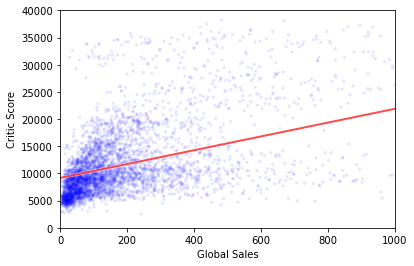

In [58]:
thinkplot.Scatter(data['Statistics.Flights.Cancelled'], data['Statistics.Flights.Total'], color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Global Sales",
                 ylabel='Critic Score',
                 axis=[0, 1000, 0, 40000],
                 legend=False)

In [59]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [60]:
Residuals(data['Statistics.Flights.Cancelled'], data['Statistics.Flights.Total'], inter, slope)

array([18131.10141295, -1298.47125591, -1265.01511369, ...,
       -1684.46997363, -1552.09848821, -5043.15611039])

<h3>Regression</h3>

In [61]:
features=data['Statistics.Flights.Cancelled']
target=data['Statistics.Flights.Total']

In [62]:
model = sm.OLS(features, target, missing="drop")
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Statistics.Flights.Cancelled   R-squared (uncentered):                   0.533
Model:                                      OLS   Adj. R-squared (uncentered):              0.533
Method:                           Least Squares   F-statistic:                              5027.
Date:                          Mon, 17 Oct 2022   Prob (F-statistic):                        0.00
Time:                                  14:06:33   Log-Likelihood:                         -30514.
No. Observations:                          4408   AIC:                                  6.103e+04
Df Residuals:                              4407   BIC:                                  6.104e+04
Df Model:                                     1                                                  
Covariance Type:                      nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Statistics.Flights.Total     0.0191      0.000     70.899      0.000       0.019       0.020
==============================================================================
Omnibus:                     4136.336   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222263.014
Skew:                           4.427   Prob(JB):                         0.00
Kurtosis:                      36.641   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
inter, slope = LeastSquares(data['Statistics.Flights.Cancelled'], data['Statistics.Flights.Total'])
inter, slope

(9183.407516219342, 12.710606809379948)

In [64]:
results.rsquared

0.5328416686518695

<h3>TSA</h3>

In [65]:
data['Time.Label'].unique()

array(['2003/06', '2003/07', '2003/08', '2003/09', '2003/10', '2003/11',
       '2003/12', '2004/01', '2004/02', '2004/03', '2004/04', '2004/05',
       '2004/06', '2004/07', '2004/08', '2004/09', '2004/10', '2004/11',
       '2004/12', '2005/01', '2005/02', '2005/03', '2005/04', '2005/05',
       '2005/06', '2005/07', '2005/08', '2005/09', '2005/10', '2005/11',
       '2005/12', '2006/01', '2006/02', '2006/03', '2006/04', '2006/05',
       '2006/06', '2006/07', '2006/08', '2006/09', '2006/10', '2006/11',
       '2006/12', '2007/01', '2007/02', '2007/03', '2007/04', '2007/05',
       '2007/06', '2007/07', '2007/08', '2007/09', '2007/10', '2007/11',
       '2007/12', '2008/01', '2008/02', '2008/03', '2008/04', '2008/05',
       '2008/06', '2008/07', '2008/08', '2008/09', '2008/10', '2008/11',
       '2008/12', '2009/01', '2009/02', '2009/03', '2009/04', '2009/05',
       '2009/06', '2009/07', '2009/08', '2009/09', '2009/10', '2009/11',
       '2009/12', '2010/01', '2010/02', '2010/03', 

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Airport.Code                                         4408 non-null   object
 1   Airport.Name                                         4408 non-null   object
 2   Time.Label                                           4408 non-null   object
 3   Time.Month                                           4408 non-null   int64 
 4   Time.Month Name                                      4408 non-null   object
 5   Time.Year                                            4408 non-null   int64 
 6   Statistics.# of Delays.Carrier                       4408 non-null   int64 
 7   Statistics.# of Delays.Late Aircraft                 4408 non-null   int64 
 8   Statistics.# of Delays.National Aviation System      4408 non-null   int64 
 9

In [67]:
test_data = data

In [68]:
test_data['Time.Label'] = pd.to_datetime(test_data['Time.Label'])

In [69]:
def GroupByDay(test_data, func=np.mean):
    groups = test_data[['Time.Label', 'Statistics.Flights.Total']].groupby('Time.Label')
    daily = groups.aggregate(func)
    daily['Date'] = daily.index
    start = daily.Date[0]
    return daily

In [70]:
GroupByDay(test_data)

,Statistics.Flights.Total,Date
Time.Label,,
2003-06-01,11460.000000,2003-06-01
2003-07-01,11944.413793,2003-07-01
2003-08-01,11921.344828,2003-08-01
2003-09-01,11291.000000,2003-09-01
2003-10-01,11854.344828,2003-10-01
...,...,...
2015-09-01,10692.137931,2015-09-01
2015-10-01,11183.862069,2015-10-01
2015-11-01,10712.517241,2015-11-01


In [71]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Airport.Code                                         4408 non-null   object        
 1   Airport.Name                                         4408 non-null   object        
 2   Time.Label                                           4408 non-null   datetime64[ns]
 3   Time.Month                                           4408 non-null   int64         
 4   Time.Month Name                                      4408 non-null   object        
 5   Time.Year                                            4408 non-null   int64         
 6   Statistics.# of Delays.Carrier                       4408 non-null   int64         
 7   Statistics.# of Delays.Late Aircraft                 4408 non-null   int64         
 8 

In [72]:
test_data['Time.Label']=test_data['Time.Label'].map(dt.datetime.toordinal)

In [73]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Airport.Code                                         4408 non-null   object
 1   Airport.Name                                         4408 non-null   object
 2   Time.Label                                           4408 non-null   int64 
 3   Time.Month                                           4408 non-null   int64 
 4   Time.Month Name                                      4408 non-null   object
 5   Time.Year                                            4408 non-null   int64 
 6   Statistics.# of Delays.Carrier                       4408 non-null   int64 
 7   Statistics.# of Delays.Late Aircraft                 4408 non-null   int64 
 8   Statistics.# of Delays.National Aviation System      4408 non-null   int64 
 9

In [74]:
features=data['Time.Label']
target=data['Statistics.Flights.Total']

In [75]:
model = sm.OLS(features, target, missing="drop")
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Time.Label   R-squared (uncentered):                   0.750
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                          1.324e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):                        0.00
Time:                        14:06:34   Log-Likelihood:                         -62730.
No. Observations:                4408   AIC:                                  1.255e+05
Df Residuals:                    4407   BIC:                                  1.255e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Statistics.Flights.Total    46.2721      0.402    115.085      0.000      45.484      47.060
==============================================================================
Omnibus:                     1308.138   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3141.412
Skew:                          -1.663   Prob(JB):                         0.00
Kurtosis:                       5.458   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
inter, slope = LeastSquares(data['Time.Label'], data['Statistics.Flights.Total'])
inter, slope

(291813.69087979884, -0.38153052095857176)

In [77]:
fit_xs, fit_ys = FitLine(data['Time.Label'], inter, slope)

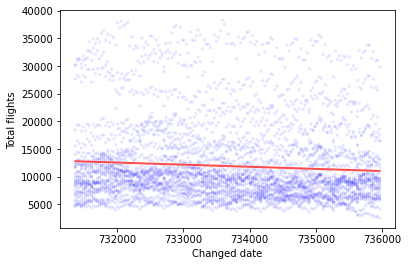

In [78]:
thinkplot.Scatter(data['Time.Label'], data['Statistics.Flights.Total'], color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Changed date",
                 ylabel='Total flights',
                 legend=False)

<h3>Survival analysis</h3>

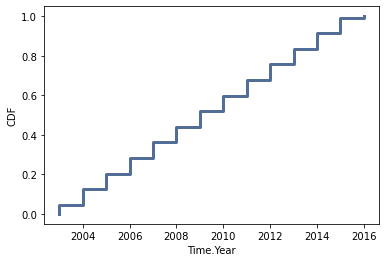

In [79]:
cdf = thinkstats2.Cdf(data['Time.Year'], label='Year')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Time.Year', ylabel='CDF', loc='upper left')

In [80]:
import survival

def MakeSurvivalFromCdf(cdf, label=''):
    """Makes a survival function based on a CDF.

    cdf: Cdf
    
    returns: SurvivalFunction
    """
    ts = cdf.xs
    ss = 1 - cdf.ps
    return survival.SurvivalFunction(ts, ss, label)

In [81]:
sf = MakeSurvivalFromCdf(cdf, label='survival')

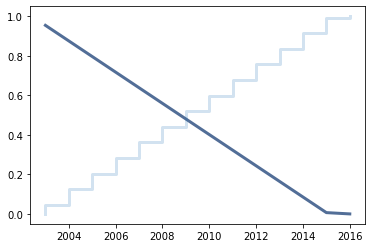

In [82]:
thinkplot.Plot(sf)
thinkplot.Cdf(cdf, alpha=0.2)
thinkplot.Config(loc='center left')

C:\Users\aaysa\Desktop\datascience\EDA\Project\survival.py:69: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=self.ts)


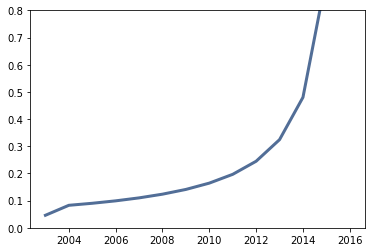

In [83]:
hf = sf.MakeHazardFunction(label='hazard')
thinkplot.Plot(hf)
thinkplot.Config(ylim=[0, 0.8], loc='upper left')